In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/student-grade-prediction/student-mat.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/kaggle/input/student-grade-prediction/student-mat.csv')

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

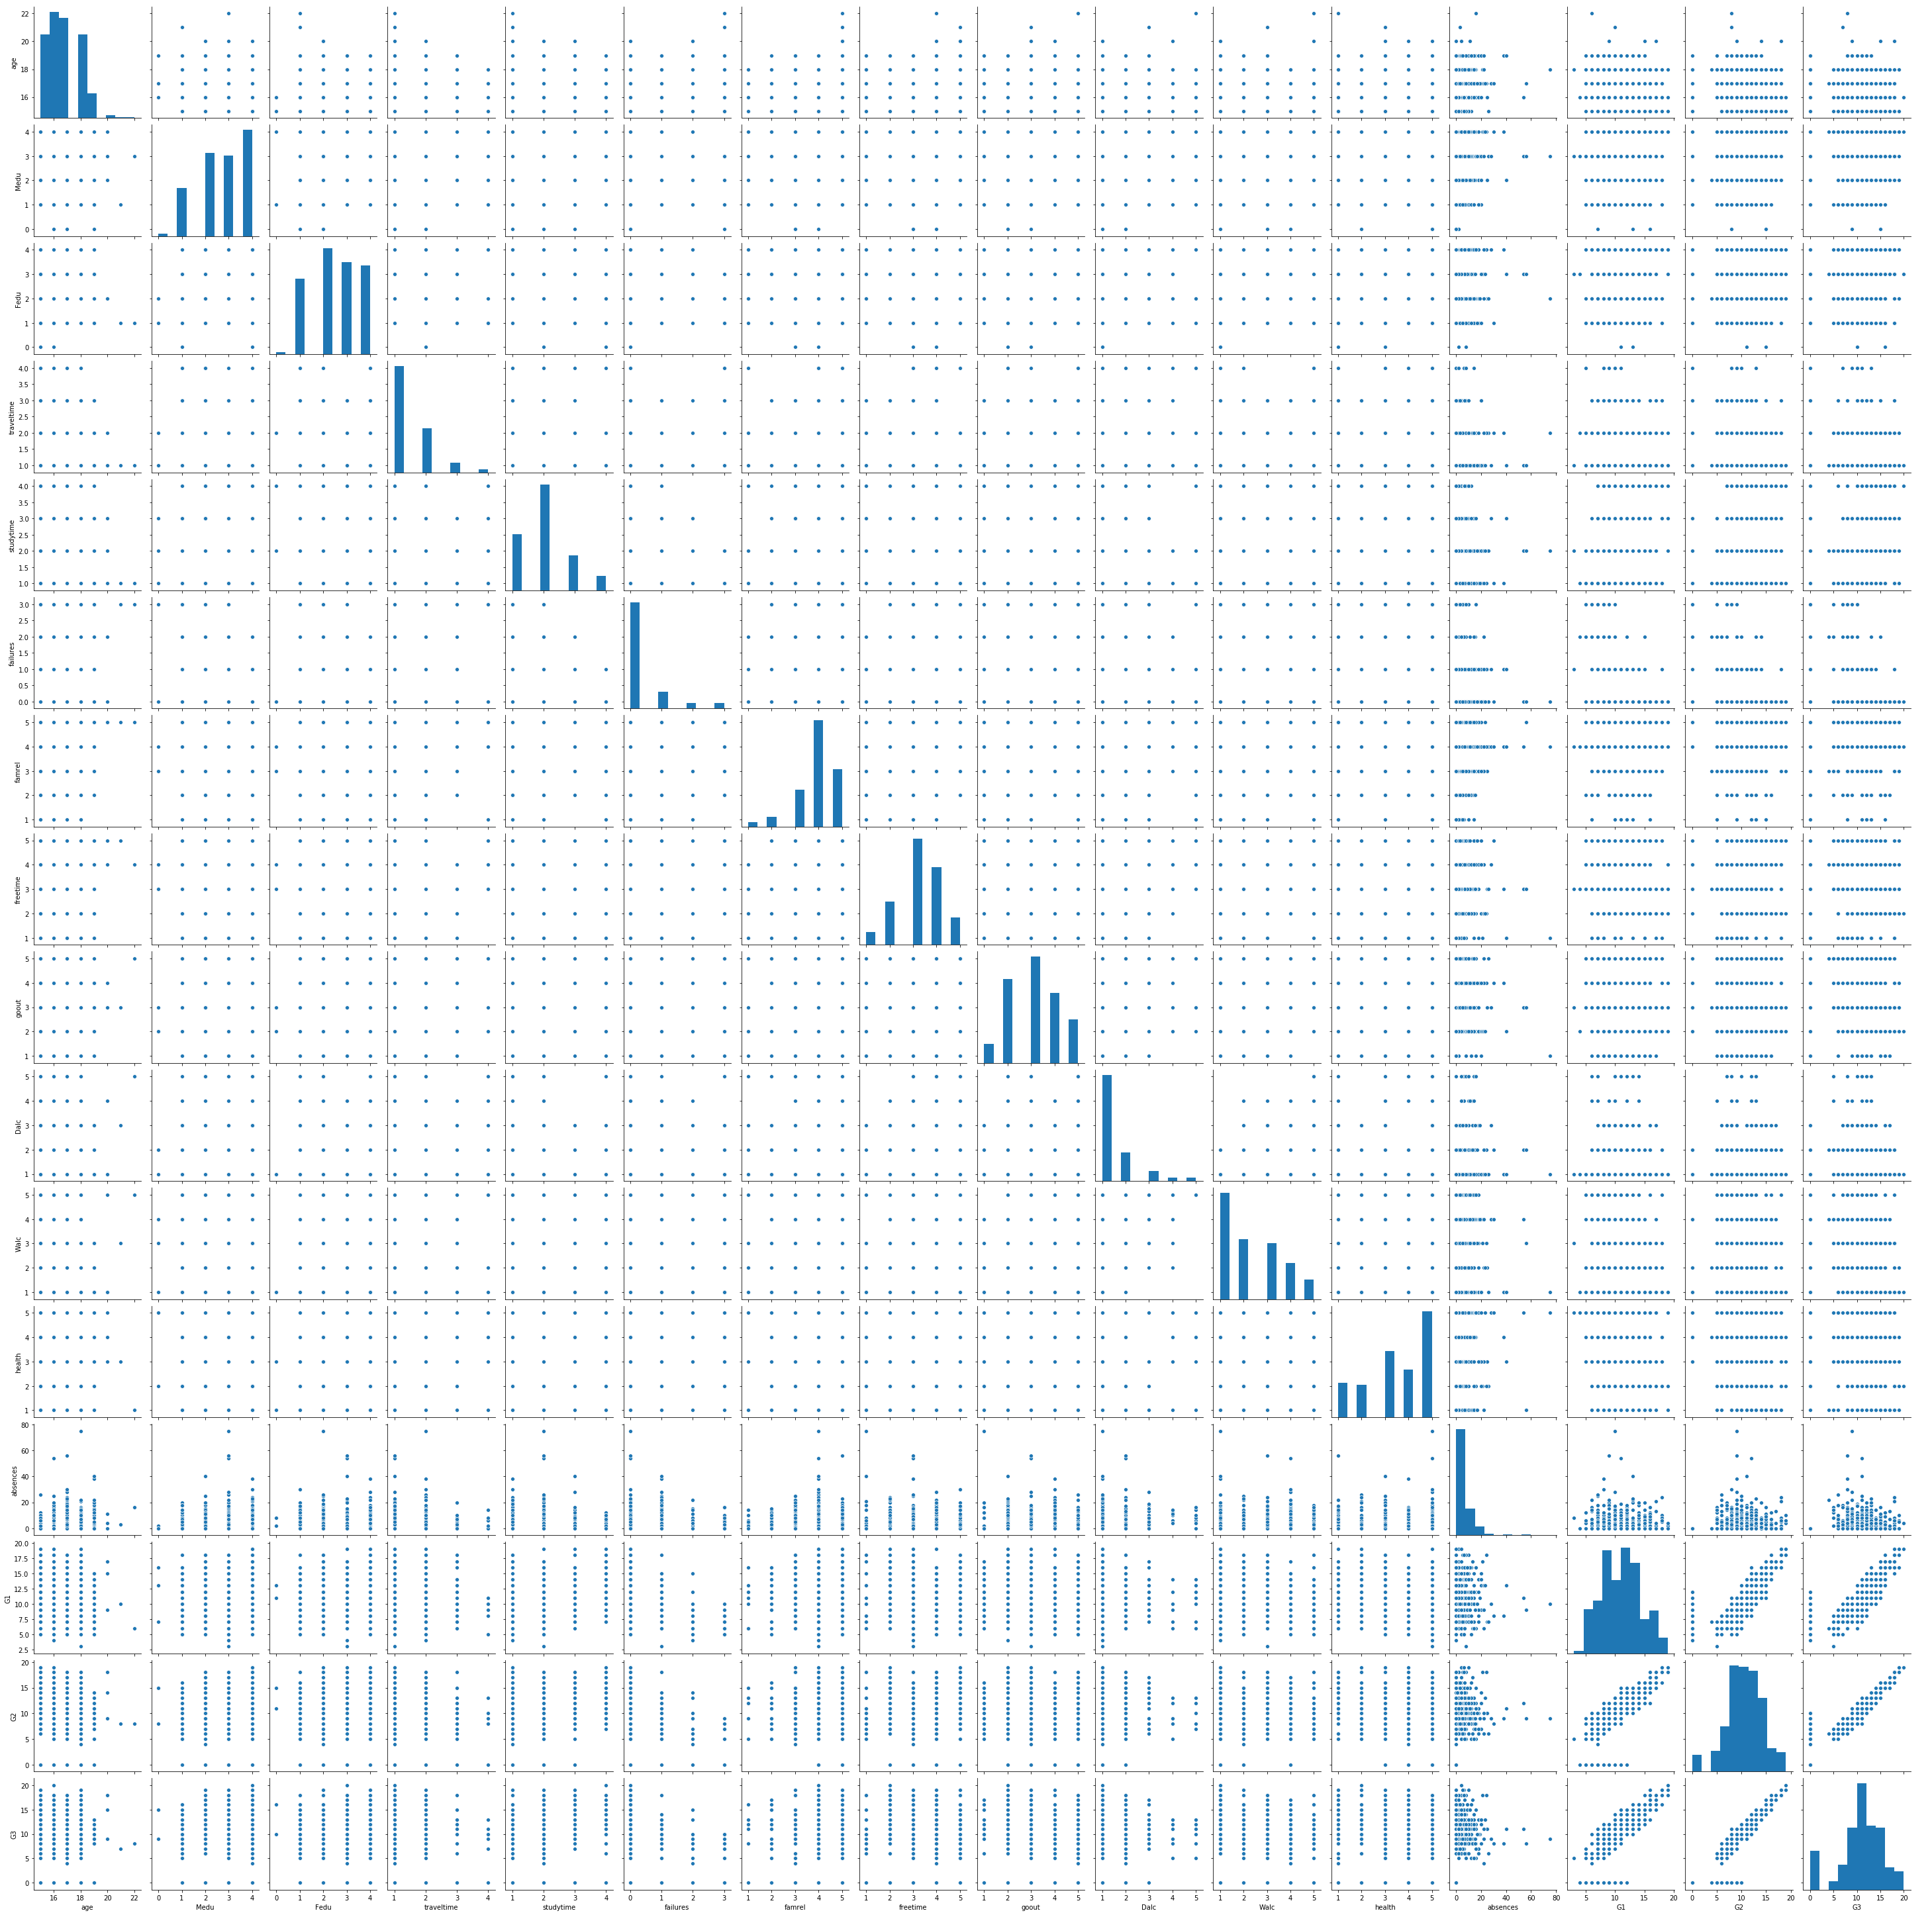

In [6]:
sns.pairplot(data)

In [7]:
col = data.columns

col = col.to_list()

In [8]:
[col.remove(x) for x in ['G1', 'G2', 'G3']]

[None, None, None]

In [9]:
col

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [11]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


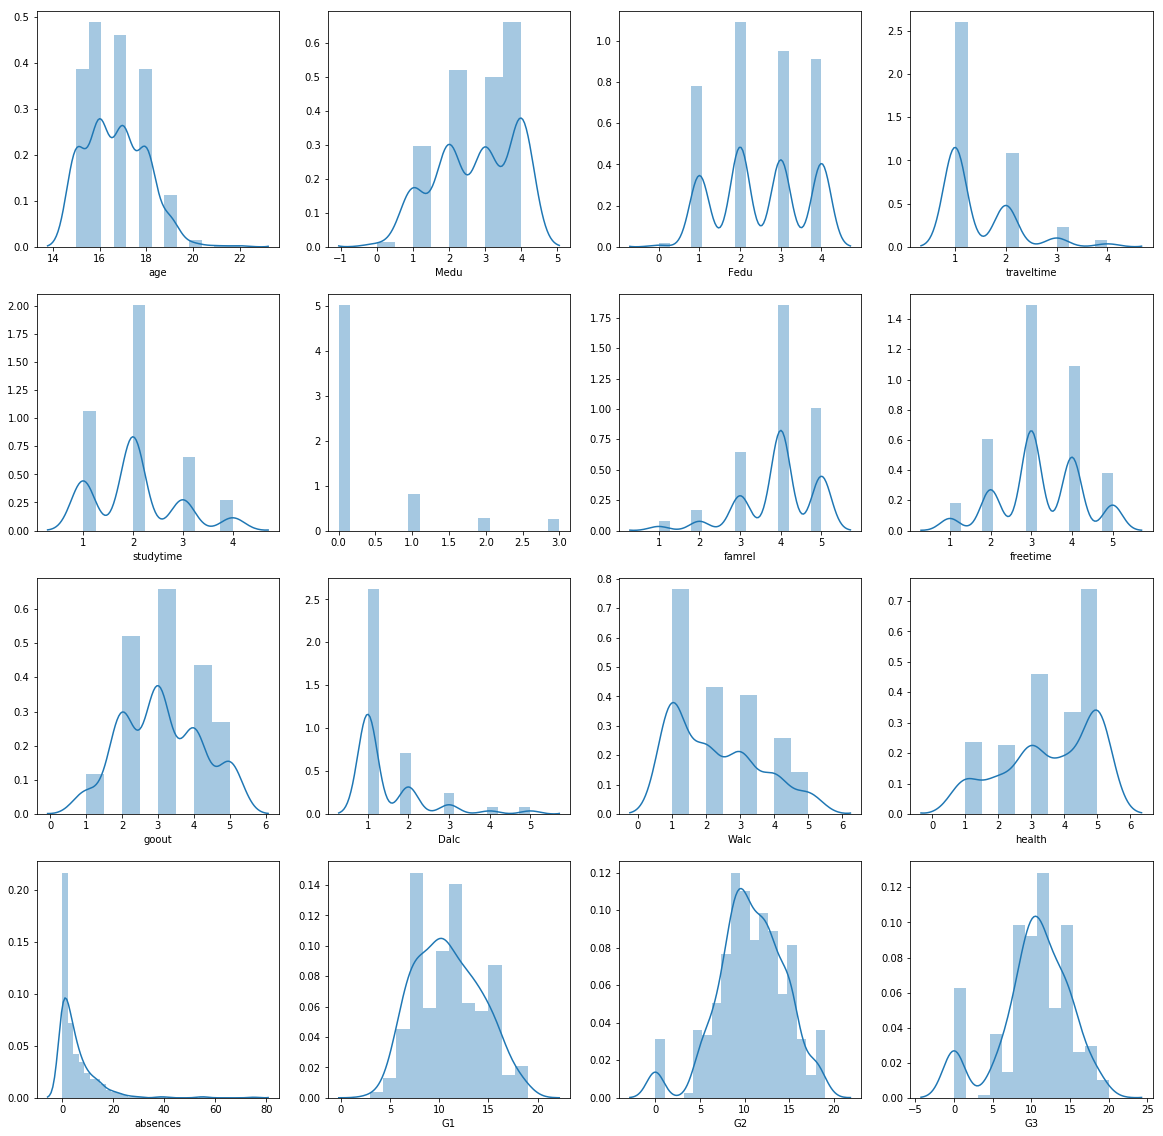

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
i = 0
j = 0
for col in data.columns:
#     plt.figure(figsize=[10, 10])
    if (j<4) and (data[col].dtype=='int64') and i<4:
        try:
            sns.distplot(data[col], ax=axes[i][j], label=col)
        except:
            pass
        j+=1
        if j==4:
            j=0
            i+=1

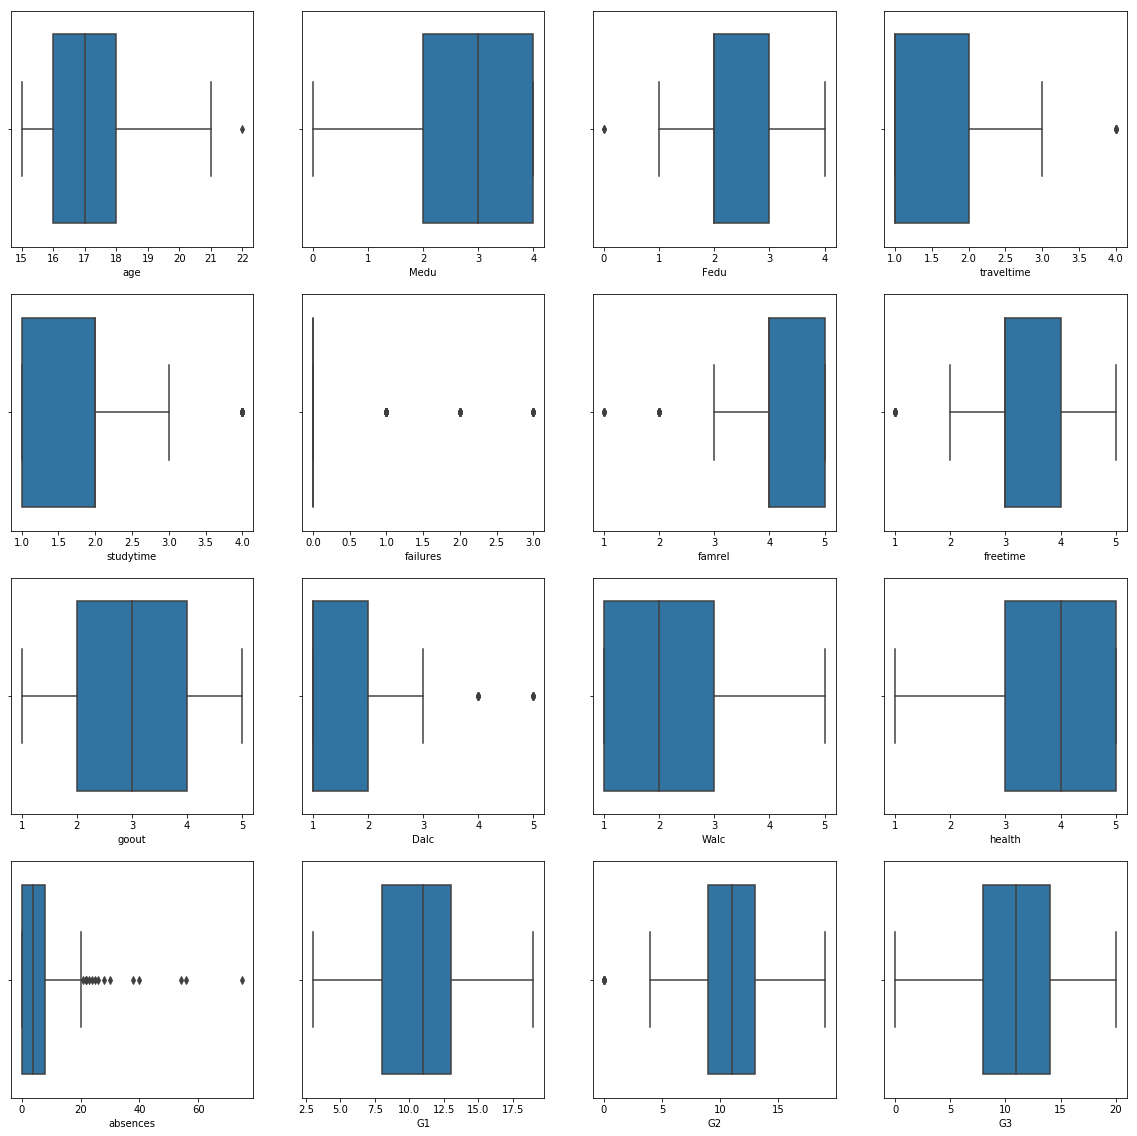

In [13]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
i = 0
j = 0
for col in data.columns:
#     plt.figure(figsize=[10, 10])
    if (j<4) and (data[col].dtype=='int64') and i<4:
        try:
            sns.boxplot(data[col], ax=axes[i][j])
        except:
            pass
        j+=1
        if j==4:
            j=0
            i+=1

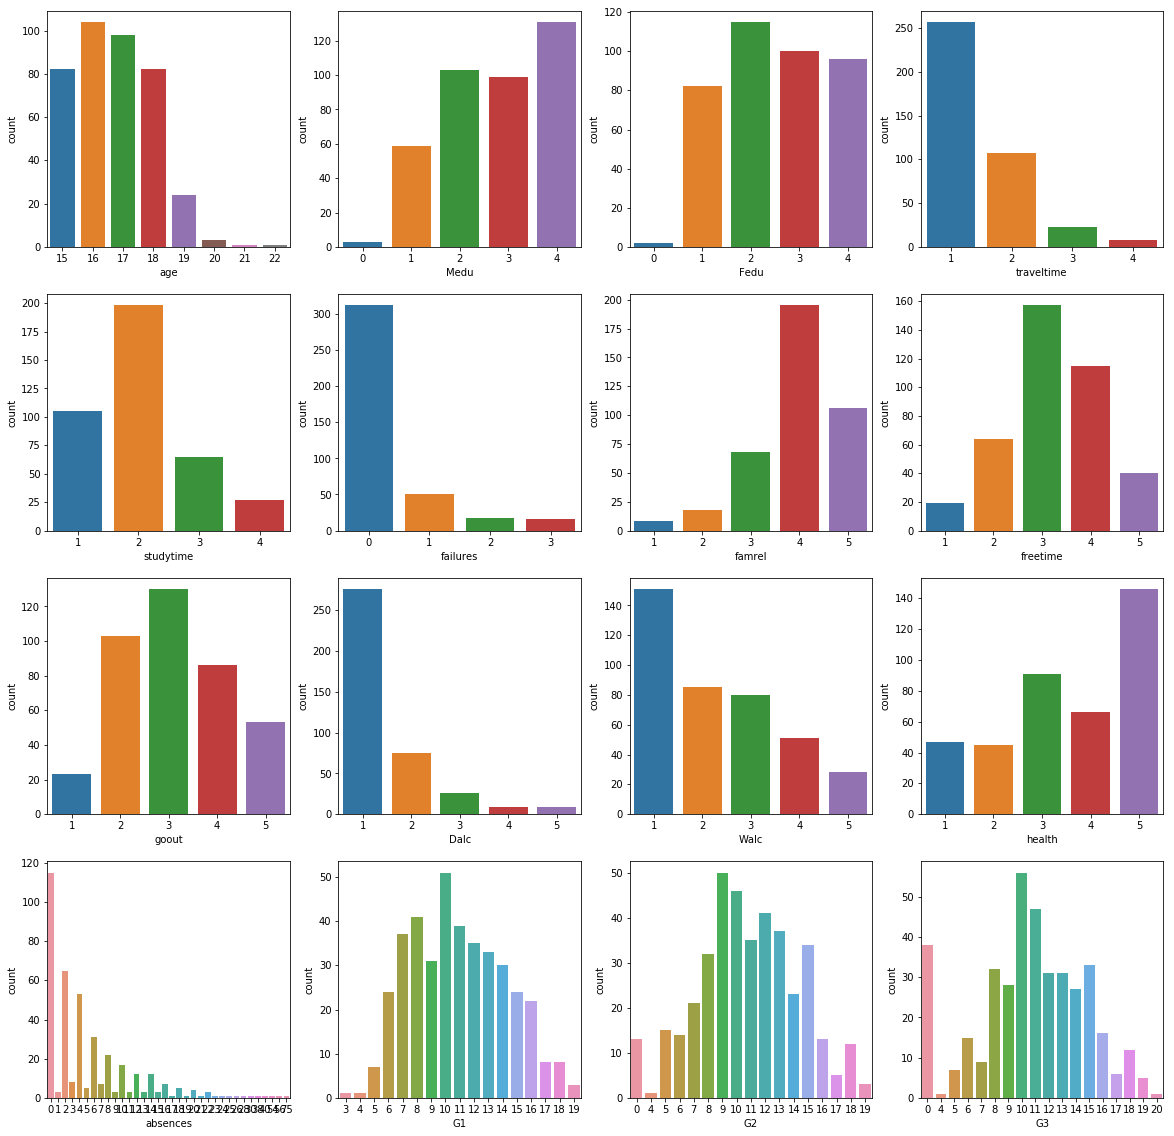

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
i = 0
j = 0
for col in data.columns:
#     plt.figure(figsize=[10, 10])
    if (j<4) and (data[col].dtype=='int64') and i<4:
        try:
            sns.countplot(data[col], ax=axes[i][j])
        except:
            pass
        j+=1
        if j==4:
            j=0
            i+=1

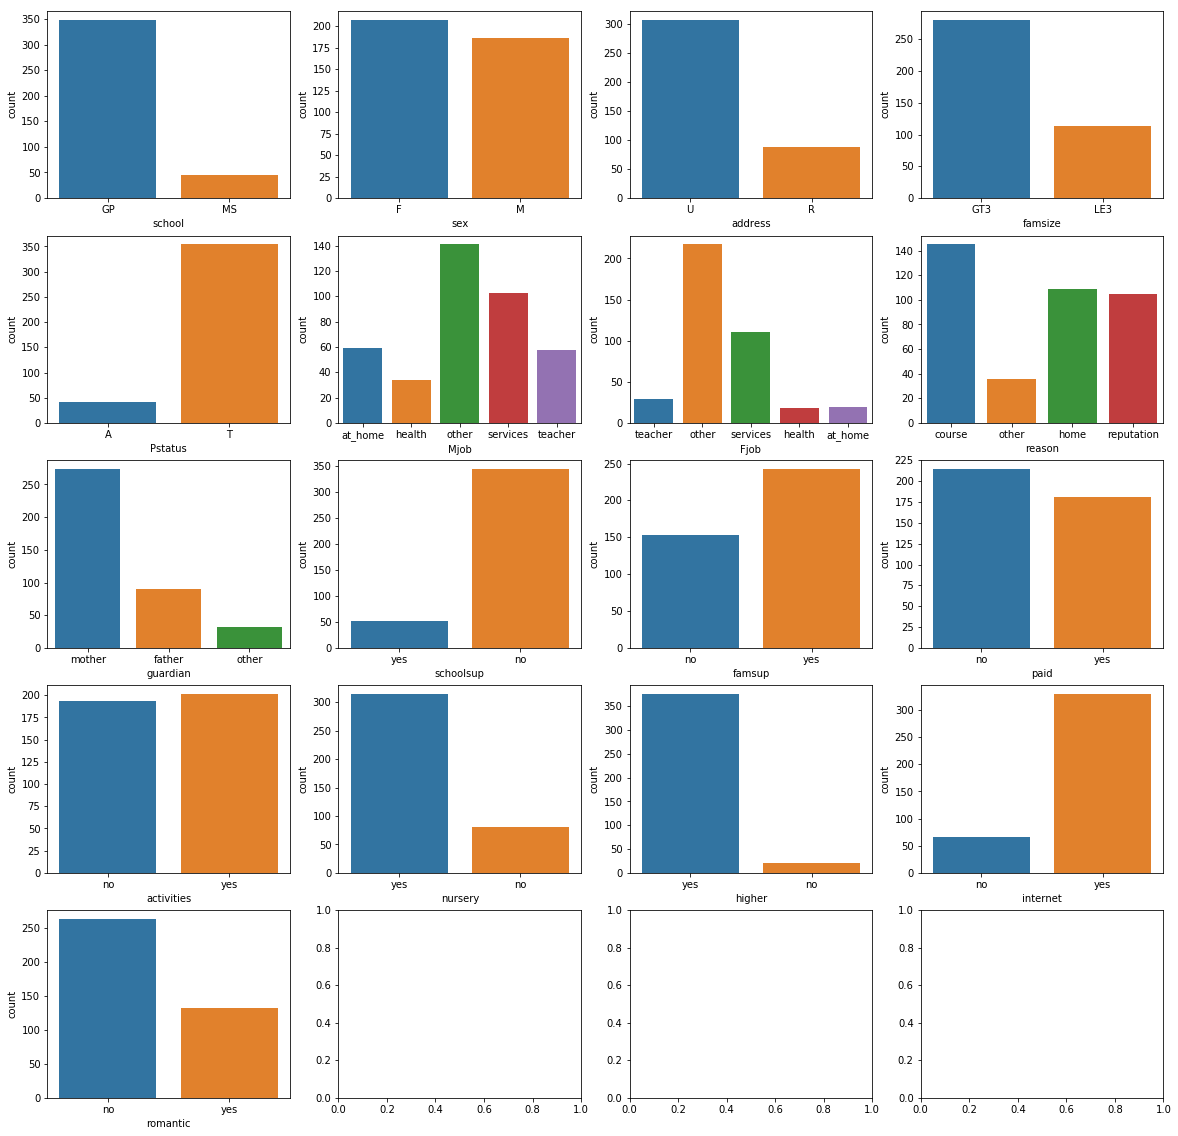

In [15]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
i = 0
j = 0
for col in data.columns:
#     plt.figure(figsize=[10, 10])
    if (j<4) and (data[col].dtype=='O') and i<5:
        try:
            sns.countplot(data[col], ax=axes[i][j])
        except:
            pass
        j+=1
        if j==4:
            j=0
            i+=1

In [16]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

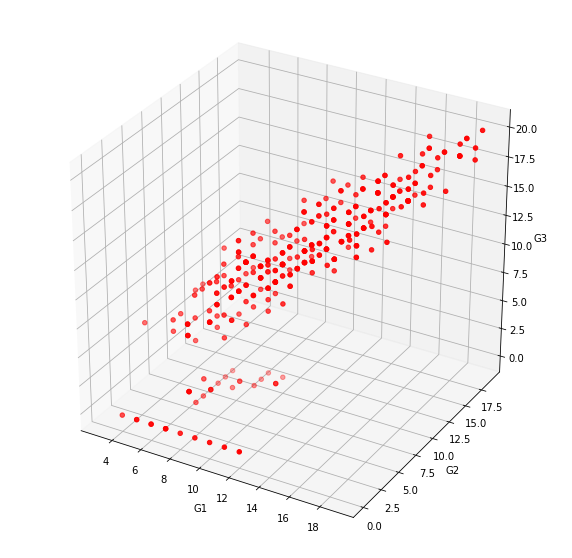

In [17]:
# before preprocessing

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.G1, data.G2, data.G3, c=['r'])
ax.set_xlabel('G1')
ax.set_ylabel('G2')
ax.set_zlabel('G3');

In [18]:
# z score normalisation
def z(x):
    return (x-data.mean())/data.std()
for col in ['absences', 'G1', 'G2']:
    ser = data[col]
    ser = ser.apply(z)
    data[col] = ser

In [19]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,-8.382323,-9.165996,-8.382323,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,-9.949669,-9.165996,-9.165996,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,-5.247632,-7.598650,-6.814978,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,-11.517014,-1.329268,-2.112941,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,-9.949669,-8.382323,-5.247632,10


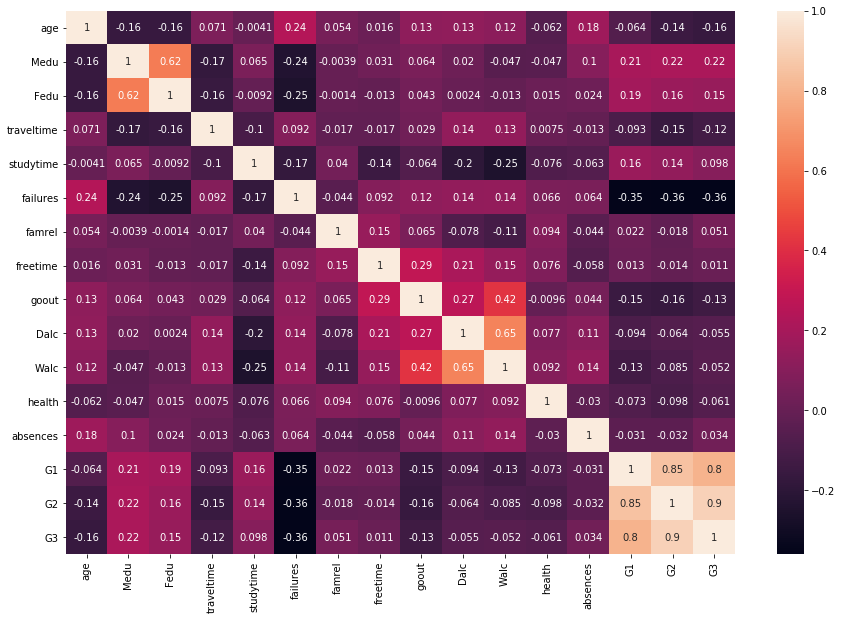

In [20]:
plt.figure(figsize=[15, 10])
sns.heatmap(data.corr(), annot=True)

In [21]:
data.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

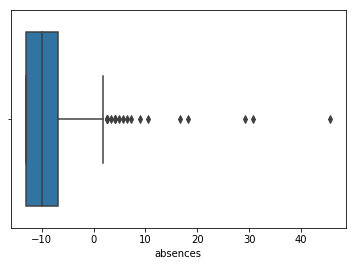

In [22]:
sns.boxplot(data.absences)

In [23]:
col = 'absences'
q1 = data[col].quantile(0.25)
q2 = data[col].quantile(0.75)
iqr = q2-q1
ul = q2+1.5*iqr
ll = q1-1.5*iqr
data = data[(data[col]>ll) & (data[col]<ul)]

In [24]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,-8.382323,-9.165996,-8.382323,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,-9.949669,-9.165996,-9.165996,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,-5.247632,-7.598650,-6.814978,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,-11.517014,-1.329268,-2.112941,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,-9.949669,-8.382323,-5.247632,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,-4.463959,-6.031305,-6.031305,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,-10.733342,-2.112941,-0.545595,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,-10.733342,-5.247632,-6.814978,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,-13.084360,-4.463959,-3.680286,10


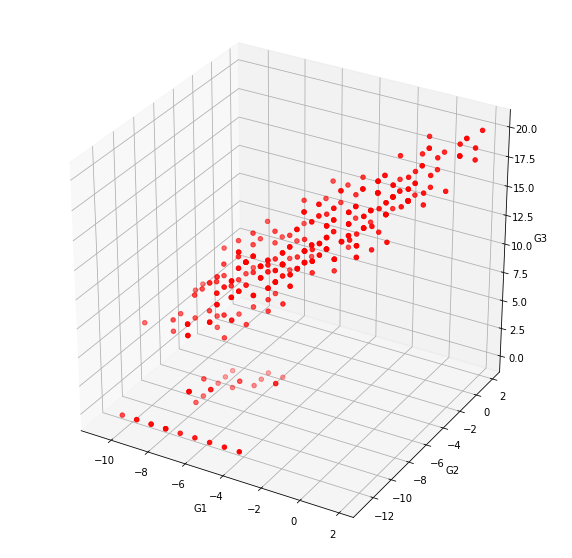

In [25]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.G1, data.G2, data.G3, c=['r'])
ax.set_xlabel('G1')
ax.set_ylabel('G2')
ax.set_zlabel('G3');

# Modelling

In [26]:
def one_hot(data):
    data = pd.get_dummies(data)
    return data

In [27]:
data1 = one_hot(data)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x = data1.drop('G3', axis=1)
y = data1.G3

In [30]:
trainx, testx, trainy, testy =  train_test_split(x, y, random_state=34, test_size=0.2)

In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [32]:
from yellowbrick.regressor import ResidualsPlot

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [33]:
from sklearn.metrics import r2_score as r2

# Linear Regression

In [34]:
model = LinearRegression()

model.fit(trainx, trainy)
trainacc = model.score(trainx, trainy)
testacc = model.score(testx, testy)
print(f'Training Accuracy is {trainacc}\nTesting accuracy is {testacc}')
y_pred = model.predict(testx)
print(f'R2 is {r2(testy, y_pred)}')

Training Accuracy is 0.8628789025474654
Testing accuracy is 0.7694406524121691
R2 is 0.7694406524121691


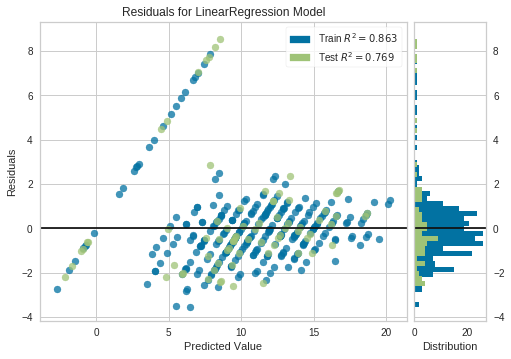

In [35]:
res = ResidualsPlot(model)
res.fit(trainx, trainy)
res.score(testx, testy)
res.show()

### this case if over fitting

In [36]:
# lets plot the coefficients
coeff = pd.Series(model.coef_, data1.columns.drop('G3'))

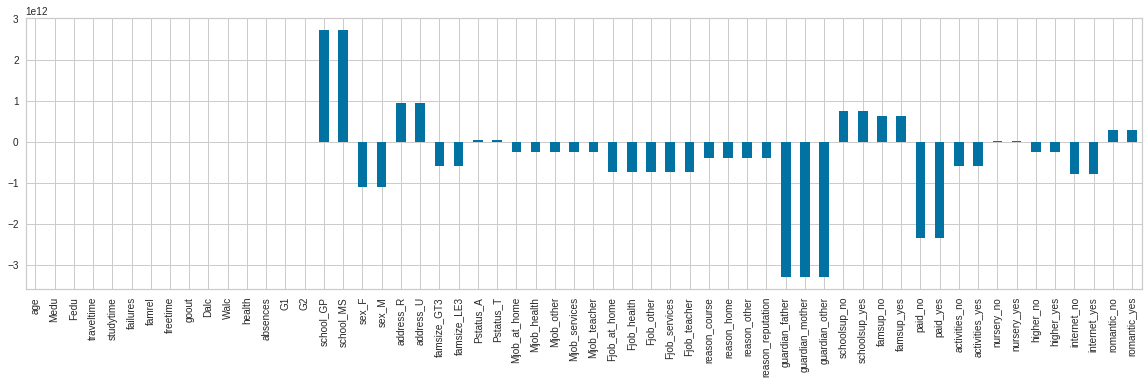

In [37]:
plt.figure(figsize=[20, 5])
coeff.plot(kind='bar')

In [38]:
# these are useless variables
coeff[(coeff.values>-0.5) & (coeff.values<0.5)]

age          -0.136156
Medu          0.038701
Fedu         -0.142543
traveltime    0.053768
studytime    -0.074568
failures     -0.338373
famrel        0.391054
freetime      0.053314
goout        -0.068636
Dalc         -0.311301
Walc          0.186748
health       -0.015860
absences      0.139517
G1            0.160178
dtype: float64

# Ridge Regression

Training Accuracy is 0.8624346290415622
Testing accuracy is 0.7795037532365104
R2 is 0.7795037532365104


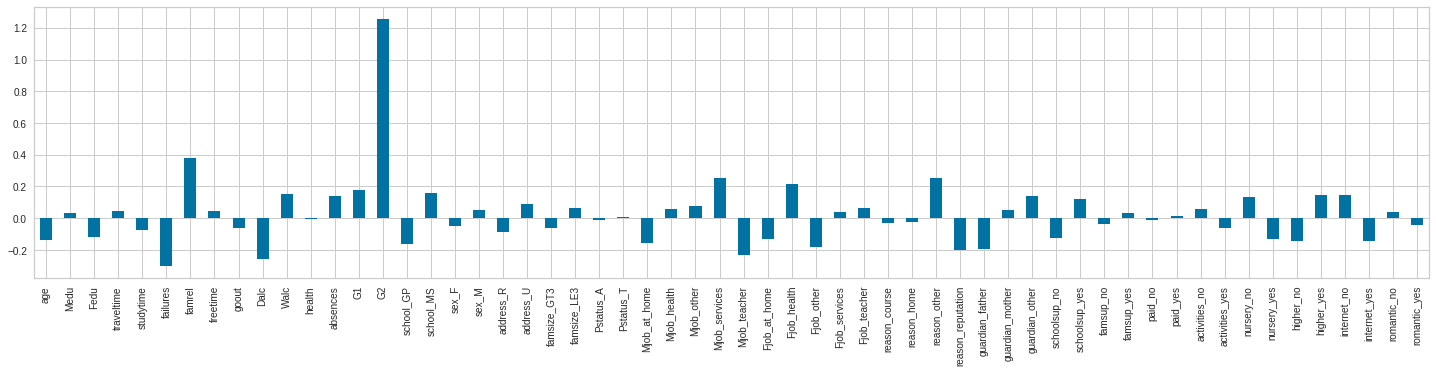

In [39]:
def train(model, display_useless=True):
    model = model( alpha=10, random_state=34)
    model.fit(trainx, trainy)
    trainacc = model.score(trainx, trainy)
    testacc = model.score(testx, testy)
    print(f'Training Accuracy is {trainacc}\nTesting accuracy is {testacc}')
    coeff = pd.Series(model.coef_, data1.columns.drop('G3'))
    plt.figure(figsize=[25, 5])
    coeff.plot(kind='bar')
    if display_useless:
        print('\nUseless columns')
        display(coeff[(coeff.values>-0.5) & (coeff.values<0.5)])
    return model
model = train(Ridge, False)
y_pred = model.predict(testx)
print(f'R2 is {r2(testy, y_pred)}')

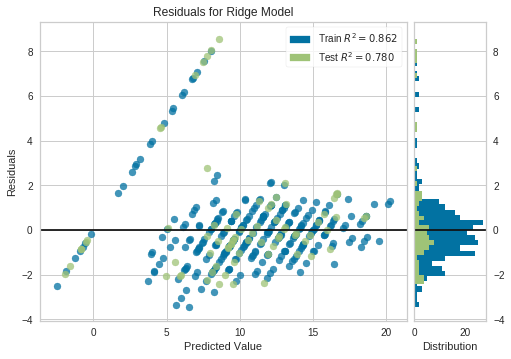

In [40]:
res = ResidualsPlot(model)
res.fit(trainx, trainy)
res.score(testx, testy)
res.show()

# Lasso

Training Accuracy is 0.8539271417377116
Testing accuracy is 0.7928591460252706
R2 is 0.7928591460252706


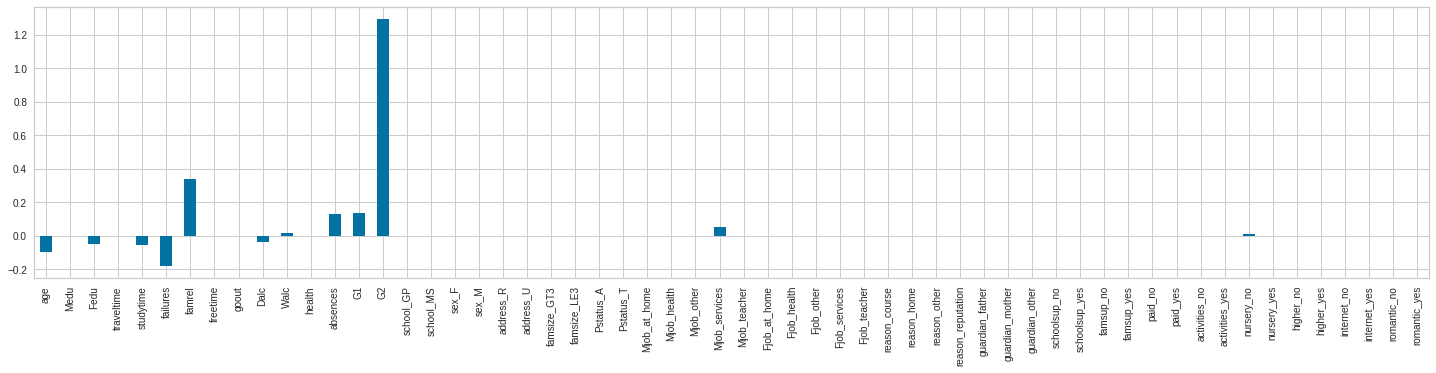

In [41]:
def train(model, display_useless=True):
    model = model( alpha=0.0457, random_state=34)
    model.fit(trainx, trainy)
    trainacc = model.score(trainx, trainy)
    testacc = model.score(testx, testy)
    print(f'Training Accuracy is {trainacc}\nTesting accuracy is {testacc}')
    coeff = pd.Series(model.coef_, data1.columns.drop('G3'))
    plt.figure(figsize=[25, 5])
    coeff.plot(kind='bar')
    if display_useless:
        print('\nUseless columns')
        display(coeff[(coeff.values>-0.5) & (coeff.values<0.5)])
    return model
model = train(Lasso, False)
y_pred = model.predict(testx)
print(f'R2 is {r2(testy, y_pred)}')

# ElasticNet

Training Accuracy is 0.8550962522189126
Testing accuracy is 0.7926378165533664

Useless columns
R2 is 0.7926378165533664


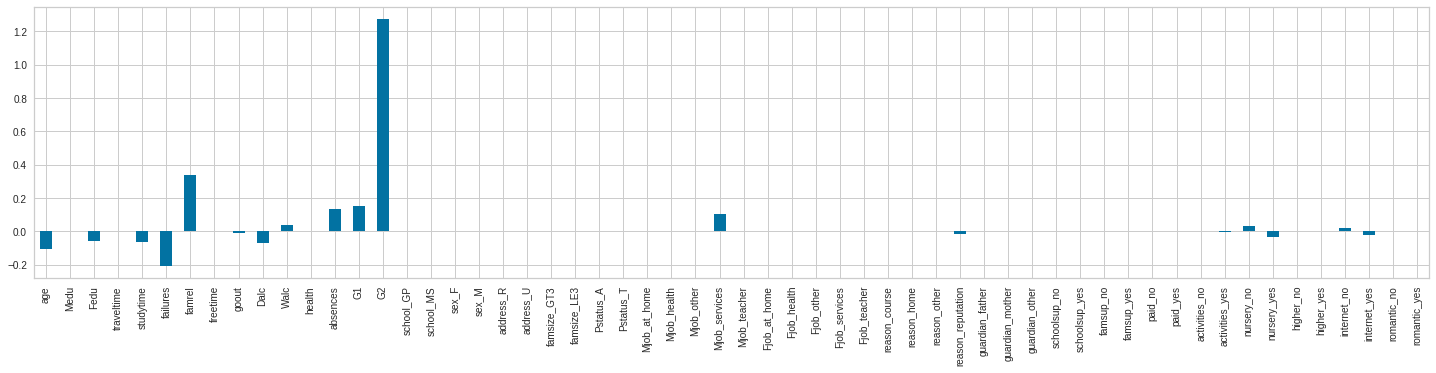

In [42]:
def train(model, display_useless=True):
    global coef_index
    model = model( alpha=0.07, random_state=34)
    model.fit(trainx, trainy)
    trainacc = model.score(trainx, trainy)
    testacc = model.score(testx, testy)
    print(f'Training Accuracy is {trainacc}\nTesting accuracy is {testacc}')
    coeff = pd.Series(model.coef_, data1.columns.drop('G3'))
    plt.figure(figsize=[25, 5])
    coeff.plot(kind='bar')
    if display_useless:
        print('\nUseless columns')
#         display(coeff[(coeff.values>-0.5) & (coeff.values<0.5)])
        coef_index = coeff[(coeff.values>-0.05) & (coeff.values<0.05)].index
    return model
model = train(ElasticNet, True)
y_pred = model.predict(testx)
print(f'R2 is {r2(testy, y_pred)}')

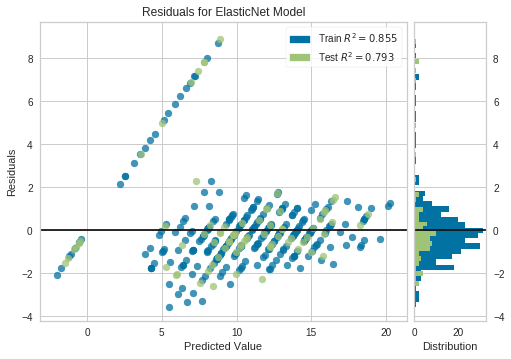

In [43]:
res = ResidualsPlot(model)
res.fit(trainx, trainy)
res.score(testx, testy)
res.show()

In [44]:
coef_index

Index(['Medu', 'traveltime', 'freetime', 'goout', 'Walc', 'health',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [45]:
trainx1 = trainx.drop(coef_index, axis = 1)
testx1 = testx.drop(coef_index, axis = 1)

Training Accuracy is 0.8541712317288068
Testing accuracy is 0.7925640017372864

Useless columns
R2 is 0.7925640017372864


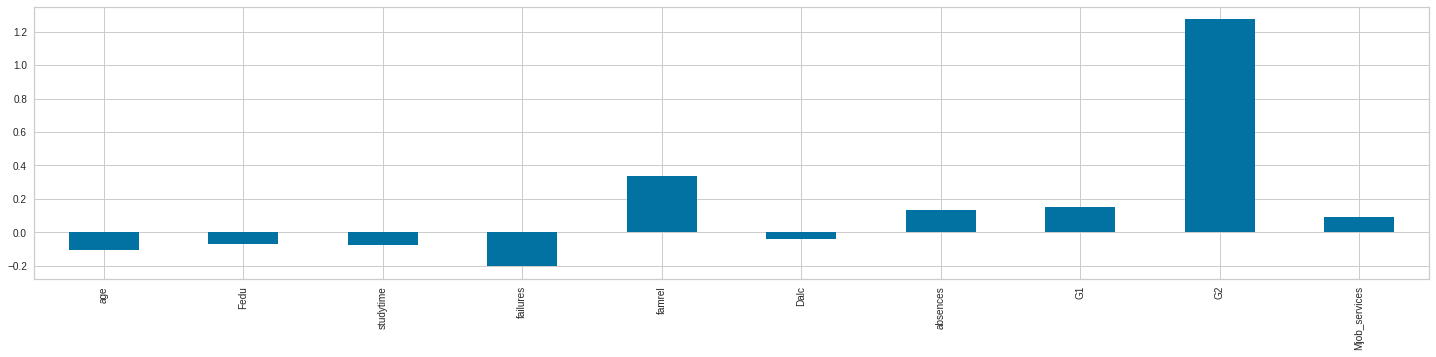

In [46]:
def train(model, display_useless=True):
    global coef_index
    model = model( alpha=0.07, random_state=34)
    model.fit(trainx1, trainy)
    trainacc = model.score(trainx1, trainy)
    testacc = model.score(testx1, testy)
    print(f'Training Accuracy is {trainacc}\nTesting accuracy is {testacc}')
    coeff = pd.Series(model.coef_, trainx1.columns)
    plt.figure(figsize=[25, 5])
    coeff.plot(kind='bar')
    if display_useless:
        print('\nUseless columns')
#         display(coeff[(coeff.values>-0.5) & (coeff.values<0.5)])
        coef_index = coeff[(coeff.values>-0.05) & (coeff.values<0.05)].index
    return model
model = train(ElasticNet, True)
y_pred = model.predict(testx1)
print(f'R2 is {r2(testy, y_pred)}')

# SVM

In [47]:
from sklearn.svm import SVR

In [48]:
def train(model, display_useless=True):
    global coef_index
    model = model(kernel='poly')
    model.fit(trainx1, trainy)
    trainacc = model.score(trainx1, trainy)
    testacc = model.score(testx1, testy)
    print(f'Training Accuracy is {trainacc}\nTesting accuracy is {testacc}')
#     coeff = pd.Series(model.coef_, data1.columns.drop('G3'))
#     plt.figure(figsize=[25, 5])
#     coeff.plot(kind='bar')
    if display_useless:
        print('\nUseless columns')
#         display(coeff[(coeff.values>-0.5) & (coeff.values<0.5)])
#         coef_index = coeff[(coeff.values>-0.05) & (coeff.values<0.05)].index
    return model
model = train(SVR, False)
y_pred = model.predict(testx1)
print(f'R2 is {r2(testy, y_pred)}')

Training Accuracy is 0.8222305373879696
Testing accuracy is 0.7673233437606657
R2 is 0.7673233437606657


# Decision Tree Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
def train(model, display_useless=True):
    global coef_imp
    model = model(random_state=34)
    model.fit(trainx, trainy)
    trainacc = model.score(trainx, trainy)
    testacc = model.score(testx, testy)
    print(f'Training Accuracy is {trainacc}\nTesting accuracy is {testacc}')
#     coeff = pd.Series(model.coef_, data1.columns.drop('G3'))
#     plt.figure(figsize=[25, 5])
#     coeff.plot(kind='bar')
    if display_useless:
#         print('\nUseless columns')
#         print(model.feature_importances_)
        coef_imp = model.feature_importances_
#         display(coeff[(coeff.values>-0.5) & (coeff.values<0.5)])
#         coef_index = coeff[(coeff.values>-0.05) & (coeff.values<0.05)].index
        
train(DecisionTreeRegressor, True)

Training Accuracy is 1.0
Testing accuracy is 0.6722836317685298


In [51]:
coef_imp
imp = pd.Series(coef_imp, data1.columns.drop('G3'))

In [52]:
trainx1 = trainx[imp[imp.values>0.08].index]
testx1 = testx[imp[imp.values>0.08].index]

In [53]:
def train(model, display_useless=True):
    global coef_imp
    model = model(random_state=34, criterion='mse', max_depth=4)
    model.fit(trainx1, trainy)
    trainacc = model.score(trainx1, trainy)
    testacc = model.score(testx1, testy)
    print(f'Training Accuracy is {trainacc}\nTesting accuracy is {testacc}')
#     coeff = pd.Series(model.coef_, data1.columns.drop('G3'))
#     plt.figure(figsize=[25, 5])
#     coeff.plot(kind='bar')
    if display_useless:
#         print('\nUseless columns')
#         print(model.feature_importances_)
        coef_imp = model.feature_importances_
#         display(coeff[(coeff.values>-0.5) & (coeff.values<0.5)])
#         coef_index = coeff[(coeff.values>-0.05) & (coeff.values<0.05)].index
    return model
model =train(DecisionTreeRegressor, True)
y_pred = model.predict(testx1)
print(f'R2 is {r2(testy, y_pred)}')

Training Accuracy is 0.8984208696203588
Testing accuracy is 0.8407589261091649
R2 is 0.8407589261091649


# Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
def train(model, display_useless=True):
    global coef_imp
    model = model(random_state=34, criterion='mse', max_depth=510, n_estimators = 100)
    model.fit(trainx1, trainy)
    trainacc = model.score(trainx1, trainy)
    testacc = model.score(testx1, testy)
    print(f'Training Accuracy is {trainacc}\nTesting accuracy is {testacc}')
#     coeff = pd.Series(model.coef_, data1.columns.drop('G3'))
#     plt.figure(figsize=[25, 5])
#     coeff.plot(kind='bar')
    if display_useless:
#         print('\nUseless columns')
#         print(model.feature_importances_)
        coef_imp = model.feature_importances_
#         display(coeff[(coeff.values>-0.5) & (coeff.values<0.5)])
#         coef_index = coeff[(coeff.values>-0.05) & (coeff.values<0.05)].index
    return model
model = train(RandomForestRegressor, True)
y_pred = model.predict(testx1)
print(f'R2 is {r2(testy, y_pred)}')

Training Accuracy is 0.9117158693278489
Testing accuracy is 0.8336641301462715
R2 is 0.8336641301462715


In [56]:
from sklearn.ensemble import VotingRegressor

In [57]:
model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=34, criterion='mse', max_depth=510, n_estimators = 100)
model3 = DecisionTreeRegressor(random_state=34, criterion='mse', max_depth=4)
model4 = ElasticNet(alpha=0.07, random_state=34)
model5 = SVR()

model = VotingRegressor([('rf', model2), ('dt', model3)])
# model = VotingRegressor([('rf', model2), ('en', model4)])

model.fit(trainx1, trainy)
trainacc = model.score(trainx1, trainy)
testacc = model.score(testx1, testy)
print(f'Training Accuracy is {trainacc}\nTesting accuracy is {testacc}')
y_pred = model.predict(testx1)
print(f'R2 is {r2(testy, y_pred)}')

Training Accuracy is 0.907864411762551
Testing accuracy is 0.8391084750453766
R2 is 0.8391084750453766


In [58]:
from sklearn.ensemble import BaggingRegressor

In [59]:
model = BaggingRegressor()

model.fit(trainx1, trainy)
trainacc = model.score(trainx1, trainy)
testacc = model.score(testx1, testy)
print(f'Training Accuracy is {trainacc}\nTesting accuracy is {testacc}')
y_pred = model.predict(testx1)
print(f'R2 is {r2(testy, y_pred)}')

Training Accuracy is 0.9106305756722761
Testing accuracy is 0.8240998348859628
R2 is 0.8240998348859628


In [60]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential

Using TensorFlow backend.


In [61]:
len(trainx.columns)

58

In [62]:
len(trainx1.columns)

2

In [63]:
len(trainx)

300

In [64]:
np.log(58*300)

9.764225485202621

In [65]:
del model, history
model = Sequential()
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='linear'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))

NameError: name 'history' is not defined

In [66]:
metric = tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics=[metric])

NameError: name 'model' is not defined

In [67]:
history = model.fit(trainx1.values, trainy.values, epochs=200, validation_split=0.1)

NameError: name 'model' is not defined

In [68]:
plt.plot(history.history['val_mean_absolute_error'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['val', 'acc'])

NameError: name 'history' is not defined

In [69]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val', 'loss'])

NameError: name 'history' is not defined

In [70]:
model.summary()

NameError: name 'model' is not defined

In [71]:
a = model.predict(testx1)
a = a.flatten()
a = pd.Series(a)


NameError: name 'model' is not defined

In [72]:
y_pred = model.predict(testx1)
print(f'R2 is {r2(testy, a)}')

NameError: name 'model' is not defined

In [73]:
G3 = testy.reset_index(drop=True)

In [74]:
p = pd.DataFrame([G3, round(a)]).transpose()

NameError: name 'a' is not defined

In [75]:
p.head(25)

NameError: name 'p' is not defined